Build NLP (Natural Language Processing) systems using TF. Learn to process text, incl. tokenizing & representing sentences as vectors, so that they can be input to a NN. Also, learn to apply RNNs, GRUs, and LSTMs in TF. Finally, train an LSTM on existing text to create original poetry!

# § 03.01. Sentiment in Text

## Word-based encodings

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
sentences = [
    'I love my dog',
    'I, love my cat',
    'You love my dog!'
]

tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


## Text-to-sequence

In [ ]:
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words=100, oov_token="")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences, maxlen=5)

print("\nWord Index = ", word_index)
print("\nSequences = ", sequences)
print("\nPadded Sequences: ", padded)


Word Index =  {'': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Sequences =  [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

Padded Sequences:  [[ 0  5  3  2  4]
 [ 0  5  3  2  7]
 [ 0  6  3  2  4]
 [ 9  2  4 10 11]]


In [ ]:
# Try w/ words that the tokenizer wasn't fit to
test_data = [
    'I really love my dog',
    'my dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)

padded = pad_sequences(test_seq, maxlen=10)
print("\nPadded Test Sequence: ", padded)


Test Sequence =  [[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]

Padded Test Sequence:  [[0 0 0 0 0 5 1 3 2 4]
 [0 0 0 0 0 2 4 1 2 1]]


## Working w/ the Tokenizer

In [ ]:
import json

In [ ]:
!wget --no-check-certificate \
    "https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json" \
    -O "/tmp/sarcasm.json"

with open("/tmp/sarcasm.json", 'r') as f:
  datastore = json.load(f)

sentences = []
labels = []
urls = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

--2024-01-26 09:55:06--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.207, 172.217.203.207, 172.253.123.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2024-01-26 09:55:06 (158 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(oov_token="")
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
print(len(word_index))
print(word_index)

sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)

29657
{'': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'from': 15, 'at': 16, 'about': 17, 'you': 18, 'this': 19, 'by': 20, 'after': 21, 'up': 22, 'out': 23, 'be': 24, 'how': 25, 'as': 26, 'it': 27, 'that': 28, 'not': 29, 'are': 30, 'your': 31, 'his': 32, 'what': 33, 'he': 34, 'all': 35, 'just': 36, 'who': 37, 'has': 38, 'will': 39, 'more': 40, 'one': 41, 'into': 42, 'report': 43, 'year': 44, 'why': 45, 'have': 46, 'area': 47, 'over': 48, 'donald': 49, 'u': 50, 'day': 51, 'says': 52, 's': 53, 'can': 54, 'first': 55, 'woman': 56, 'time': 57, 'like': 58, 'her': 59, "trump's": 60, 'old': 61, 'no': 62, 'get': 63, 'off': 64, 'an': 65, 'life': 66, 'people': 67, 'obama': 68, 'now': 69, 'house': 70, 'still': 71, "'": 72, 'women': 73, 'make': 74, 'was': 75, 'than': 76, 'white': 77, 'back': 78, 'my': 79, 'i': 80, 'clinton': 81, 'down': 82, 'if': 83, '5': 84, 'when': 85, 'world': 86, 'could': 87, 'we': 88, 't

## Ex. 1) Exploringg BBC News Data

In [ ]:
import csv

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
!wget --no-check-certificate \
    "https://huggingface.co/datasets/SetFit/bbc-news/blob/main/bbc-text.csv" \
    -O "/tmp/bbc-text.csv"

--2024-01-26 10:11:35--  https://huggingface.co/datasets/SetFit/bbc-news/blob/main/bbc-text.csv
Resolving huggingface.co (huggingface.co)... 65.8.178.118, 65.8.178.12, 65.8.178.27, ...
Connecting to huggingface.co (huggingface.co)|65.8.178.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35251 (34K) [text/html]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]  34.42K  --.-KB/s    in 0.004s  

2024-01-26 10:11:35 (8.78 MB/s) - ‘/tmp/bbc-text.csv’ saved [35251/35251]



In [ ]:
# Stopwords list -- https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js
# stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
#              "be", "because", "been", "before", "being", "below", "between", "both", "but", "by",
#               "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further",
#               "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's",
#               "hers", "herself", "him", "himself", "his", "how", "how's",
#               "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself",
#               "let's", "me", "more", "most", "my", "myself", "nor",
#               "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own",
#               "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such",
#               "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there",
#               "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through",
#               "to", "too", "under", "until", "up", "very",
#               "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's",
#               "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would",
#               "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]



See distinct notebook: C3W1_Assignment.ipynb

# § 03.02. Word Embeddings

## The IMDb Dataset

In [ ]:
import tensorflow as tf
print(tf.__version__)

# !pip install -q tensorflow-datasets

2.15.0


In [ ]:
import tensorflow_datasets as tfds

In [ ]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteUPWYFD/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteUPWYFD/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteUPWYFD/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
import numpy as np

In [ ]:
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s, l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

for s, l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = "<00V>"

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(training_sentences[3])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you <00V> into a big arm chair and <00V> for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no <00V> to cross no dangerous waters just a warm and witty <00V> through new york life at its best a family film in every sense and one that deserves the praise it received
This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.


In [ ]:
model_IMDB = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_IMDB.compile(loss='binary_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])
model_IMDB.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 6)                 11526     
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171533 (670.05 KB)
Trainable params: 171533 (670.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
num_epochs = 10

model_IMDB.fit(padded, training_labels_final,
               epochs=num_epochs,
               validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 6s 7ms/step - loss: 0.4898 - accuracy: 0.7467 - val_loss: 0.3482 - val_accuracy: 0.8474
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2380 - accuracy: 0.9083 - val_loss: 0.3640 - val_accuracy: 0.8430
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 0.0915 - accuracy: 0.9761 - val_loss: 0.4577 - val_accuracy: 0.8248
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0218 - accuracy: 0.9974 - val_loss: 0.5324 - val_accuracy: 0.8261
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0056 - accuracy: 0.9994 - val_loss: 0.5960 - val_accuracy: 0.8242
Epoch 6/10
782/782 [==============================] - 7s 8ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6442 - val_accuracy: 0.8272
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 8.5119e-04 - accuracy: 1.0000 - val_loss: 0.6876 - val_accuracy: 0.8270
Ep

In [ ]:
e = model_IMDB.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [ ]:
import io

In [ ]:
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")

out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentence = "I really think this is amazing. Honestly!"
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

[[11, 64, 102, 12, 7, 478, 1248]]


Project using https://projector.tensorflow.org/:

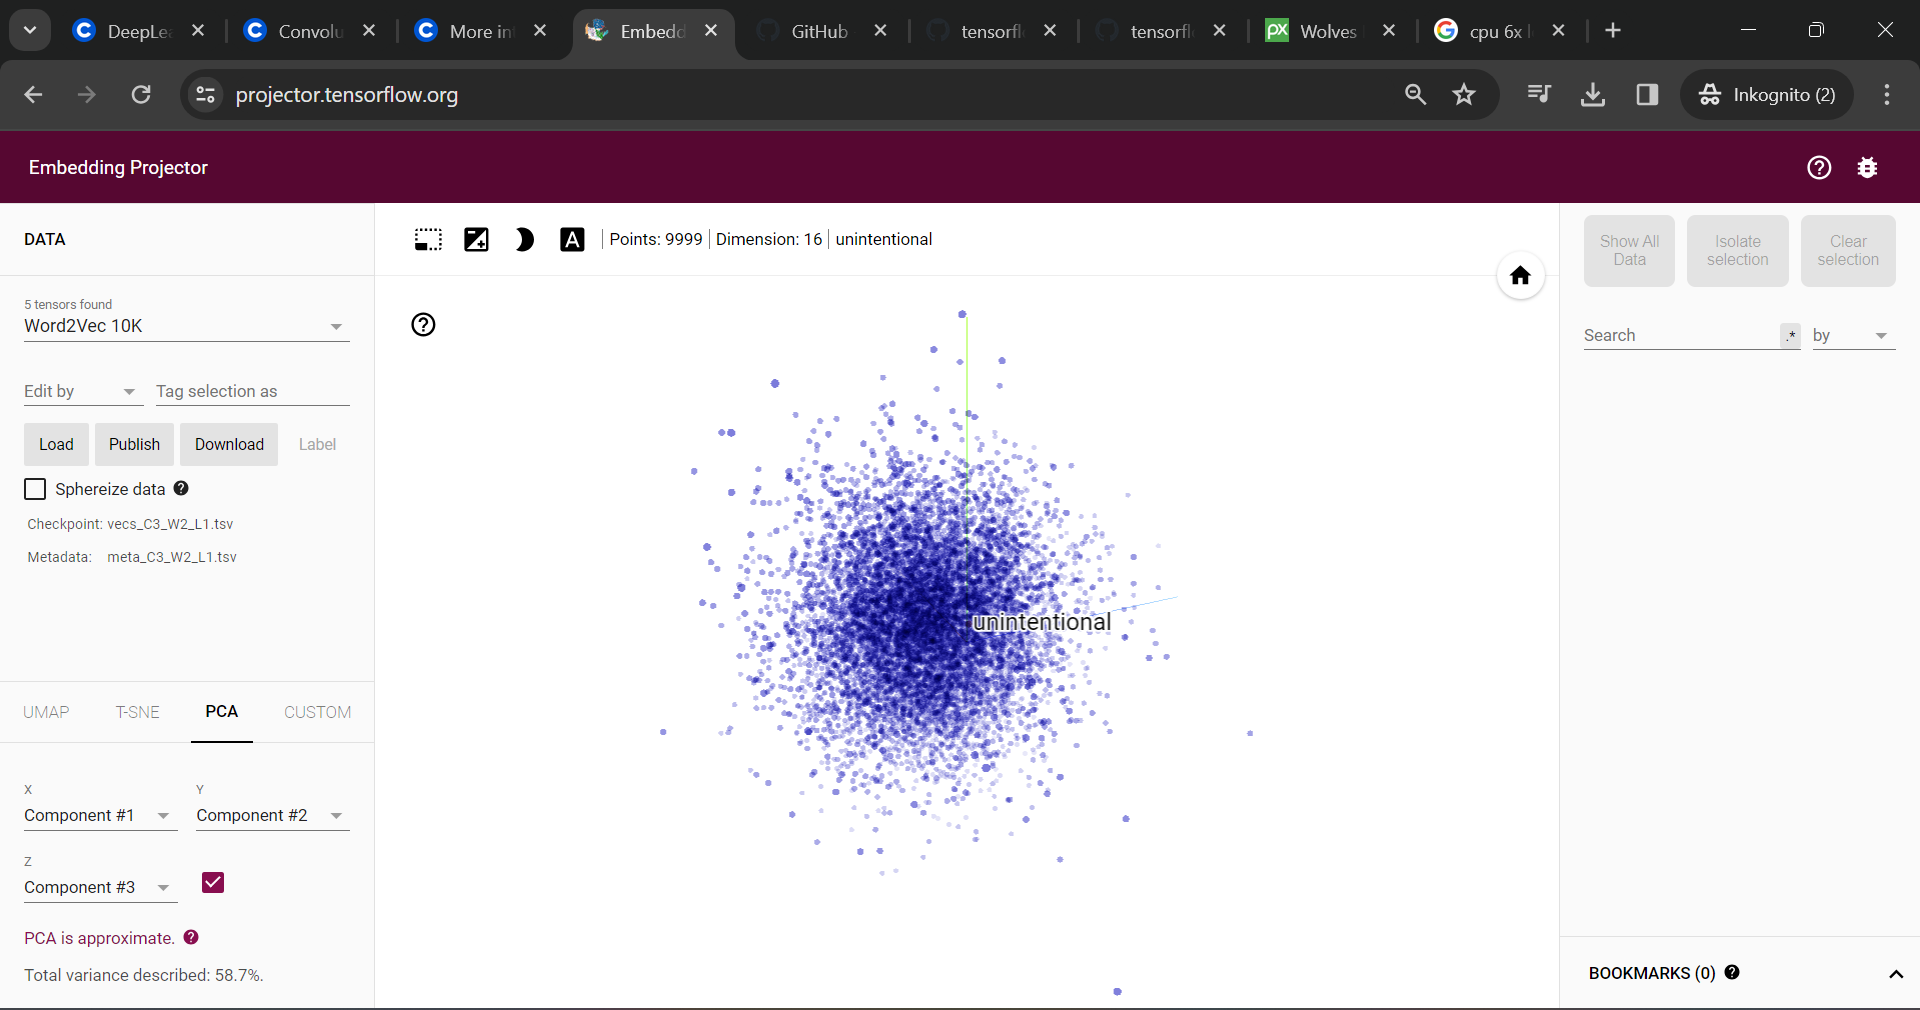

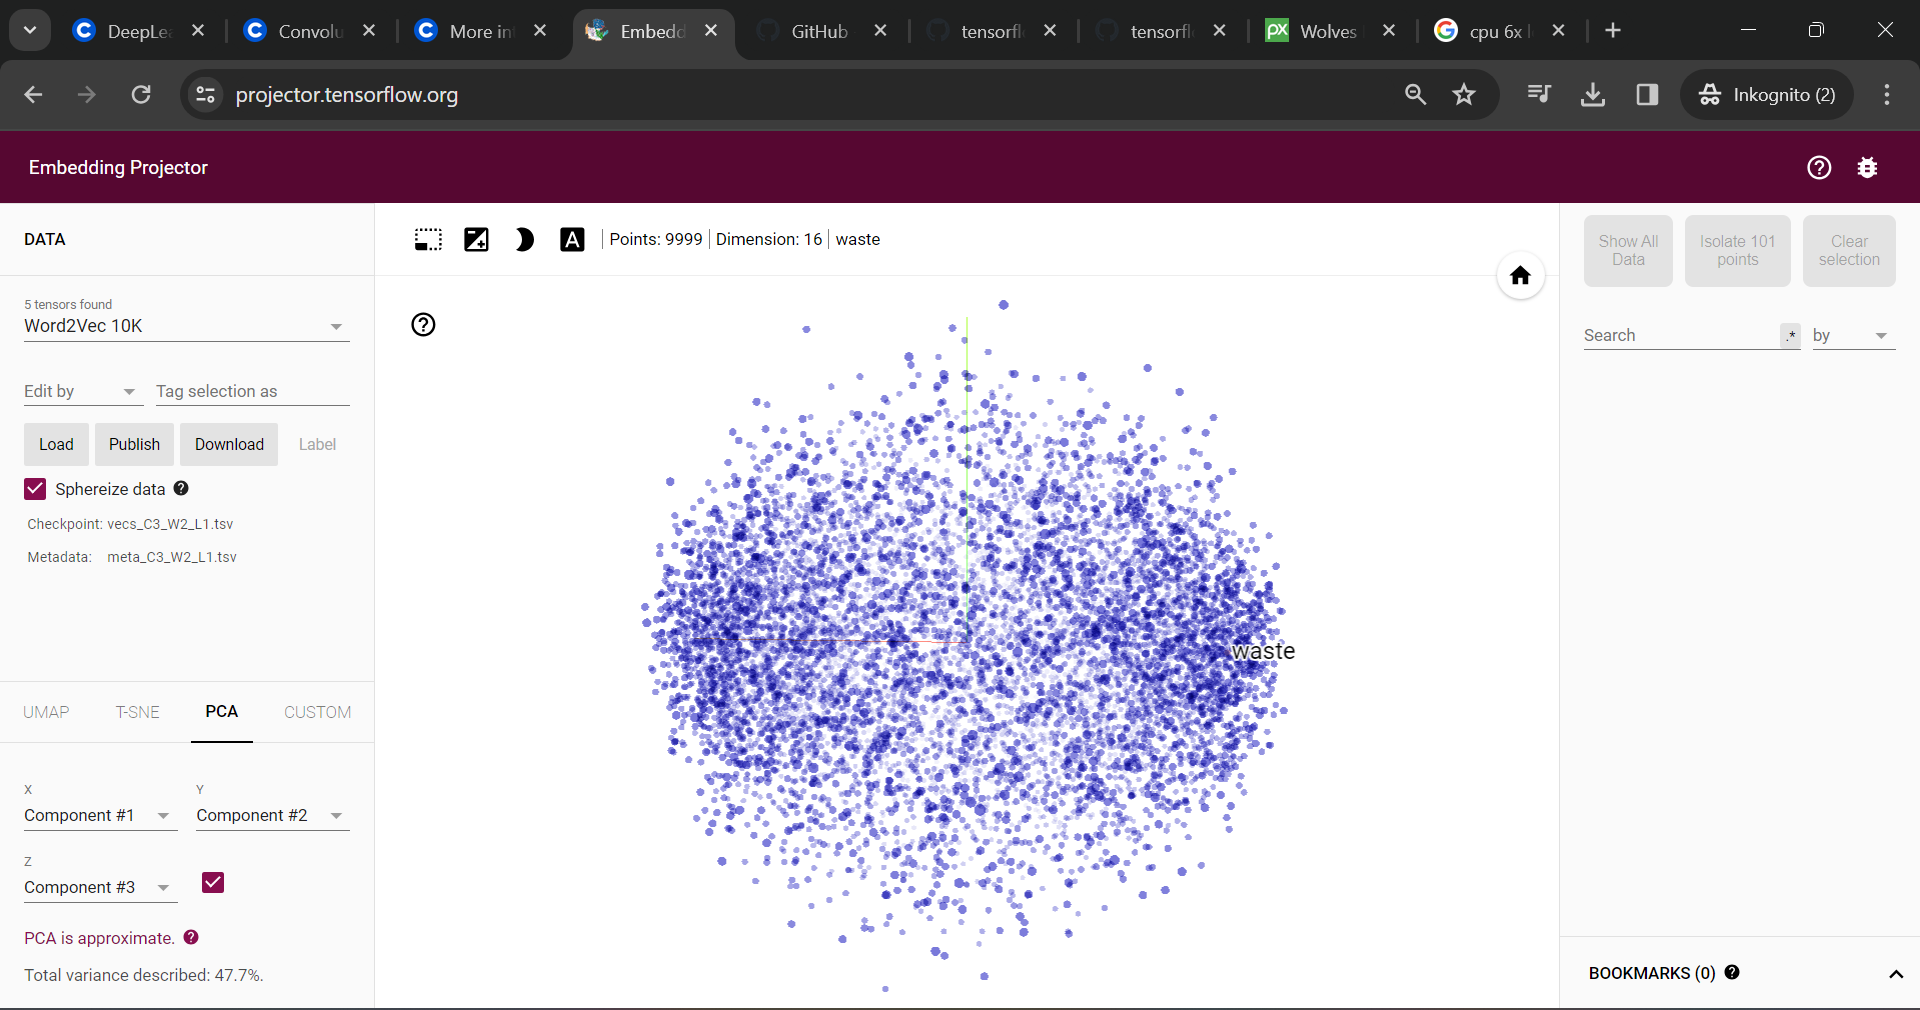

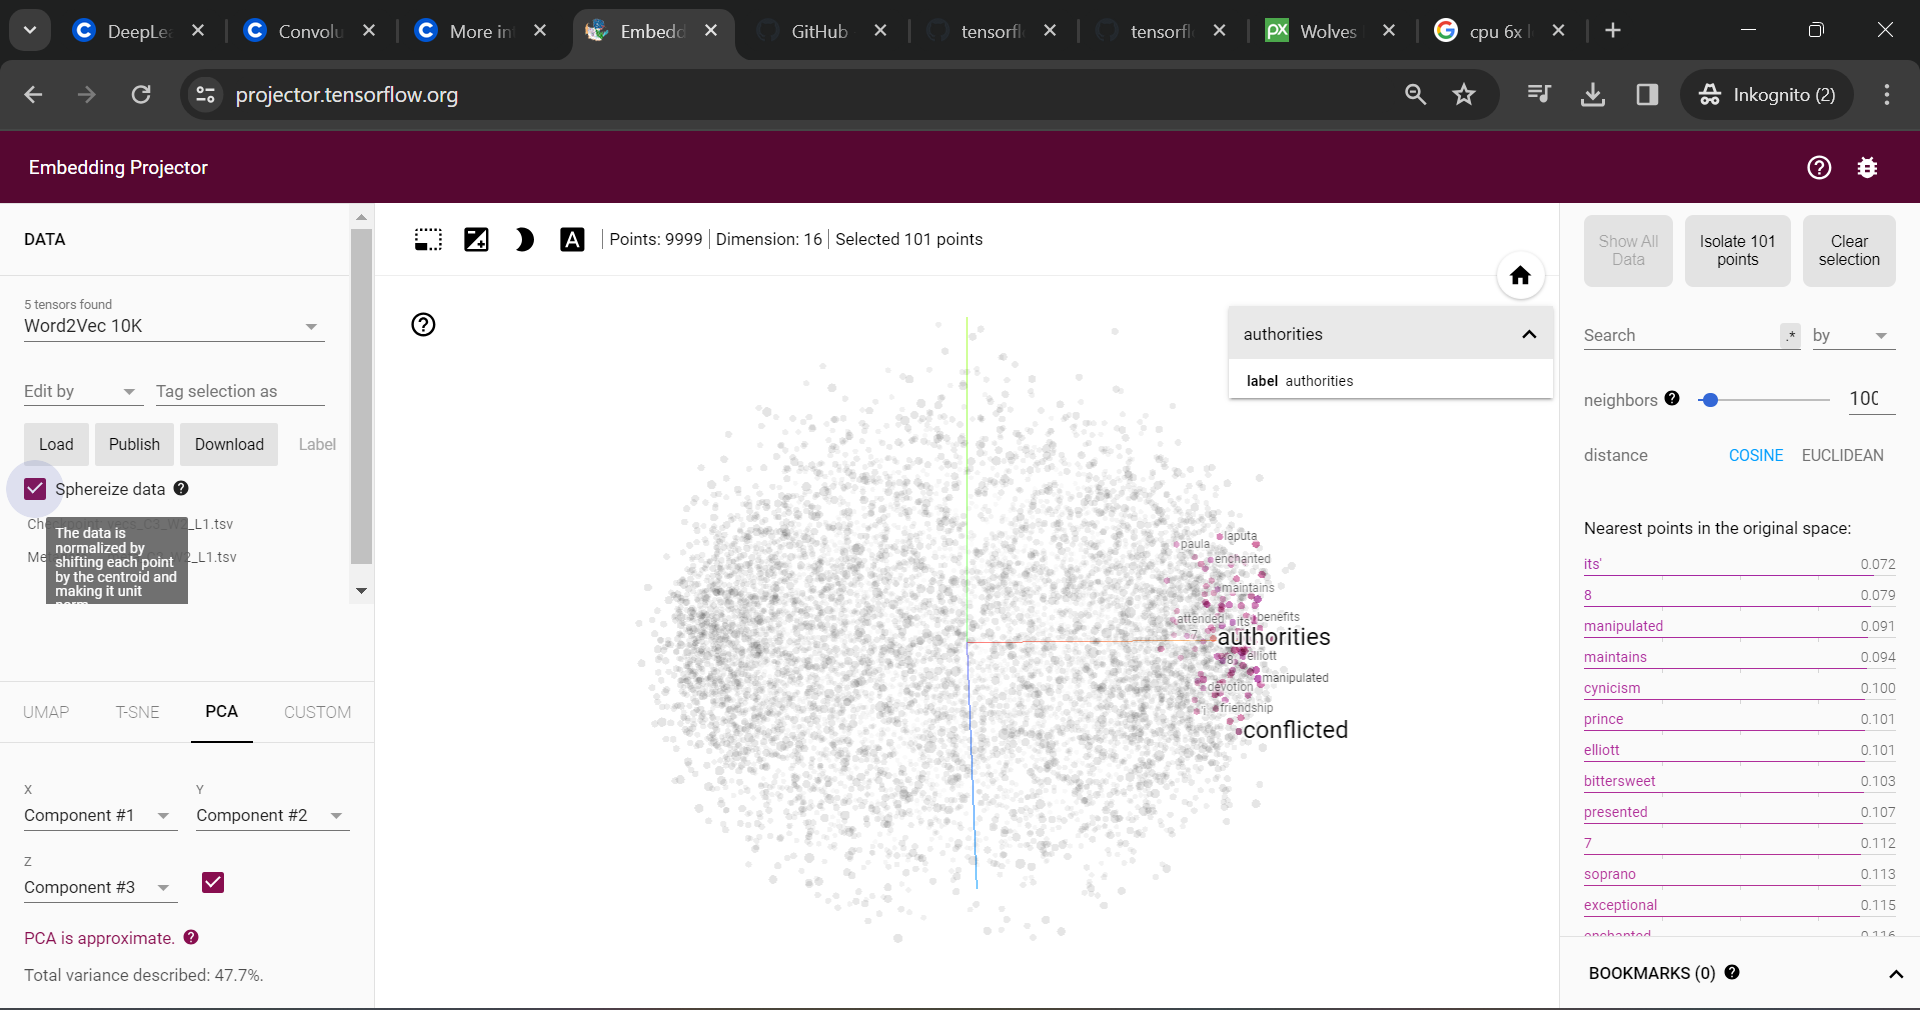

## The Sarcasm Dataset

In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
!wget "https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json" \
    -O "/tmp/sarcasm.json"

--2024-01-26 09:18:57--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.207, 173.194.215.207, 173.194.216.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2024-01-26 09:18:57 (140 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
with open("/tmp/sarcasm.json", 'r') as f:
  datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = ""
training_size = 20000

In [ ]:
training_sentences = sentences[0 : training_size]
testing_sentences = sentences[training_size :]
training_labels = labels[0 : training_size]
testing_labels = labels[training_size :]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
import numpy as np

In [ ]:
model_S = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_S.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
model_S.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
num_epochs = 30

# Need this block to get it to work w/ TF 2.x
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

history_S = model_S.fit(training_padded, training_labels,
                        epochs=num_epochs,
                        validation_data=(testing_padded, testing_labels),
                        verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6648 - accuracy: 0.5868 - val_loss: 0.5833 - val_accuracy: 0.8052 - 3s/epoch - 5ms/step
Epoch 2/30
625/625 - 3s - loss: 0.4325 - accuracy: 0.8314 - val_loss: 0.3865 - val_accuracy: 0.8422 - 3s/epoch - 5ms/step
Epoch 3/30
625/625 - 3s - loss: 0.3136 - accuracy: 0.8749 - val_loss: 0.3546 - val_accuracy: 0.8518 - 3s/epoch - 5ms/step
Epoch 4/30
625/625 - 2s - loss: 0.2613 - accuracy: 0.8999 - val_loss: 0.3446 - val_accuracy: 0.8559 - 2s/epoch - 4ms/step
Epoch 5/30
625/625 - 2s - loss: 0.2256 - accuracy: 0.9125 - val_loss: 0.3442 - val_accuracy: 0.8550 - 2s/epoch - 4ms/step
Epoch 6/30
625/625 - 2s - loss: 0.1986 - accuracy: 0.9258 - val_loss: 0.3535 - val_accuracy: 0.8521 - 2s/epoch - 4ms/step
Epoch 7/30
625/625 - 3s - loss: 0.1766 - accuracy: 0.9352 - val_loss: 0.3596 - val_accuracy: 0.8553 - 3s/epoch - 4ms/step
Epoch 8/30
625/625 - 3s - loss: 0.1573 - accuracy: 0.9420 - val_loss: 0.3825 - val_accuracy: 0.8509 - 3s/epoch - 5ms/step
Epoch 9/30
625/625 - 2s 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

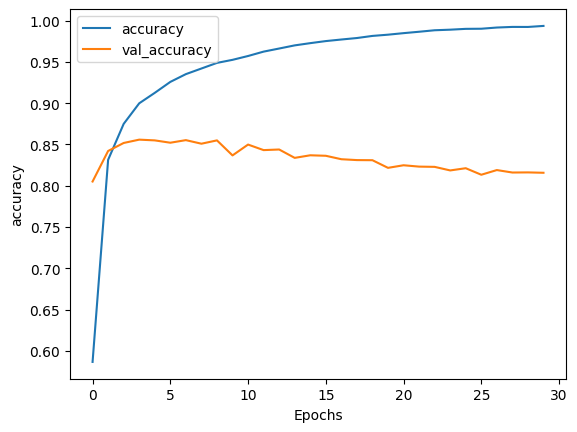

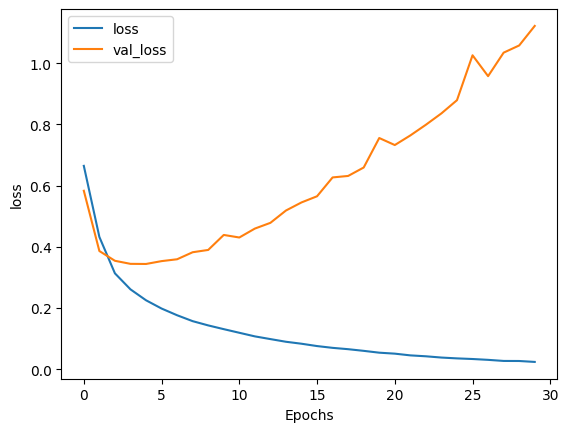

In [ ]:
plot_graphs(history_S, 'accuracy')
plot_graphs(history_S, 'loss')

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former  store clerk sues over secret 'black  for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [ ]:
e = model_S.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [ ]:
import io

In [ ]:
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")

out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real",
            "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model_S.predict(padded))

1/1 [==============================] - 0s 90ms/step
[[7.7105772e-01]
 [4.0566124e-06]]


## The IMDb Dataset--Subword Tokenization

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
import tensorflow_datasets as tfds

In [ ]:
imdb_plaintext, info_plaintext = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

imdb_subwords, info_subwords = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete1YQVC9/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete1YQVC9/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete1YQVC9/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
info_plaintext.features

for example in imdb_plaintext['train'].take(2):
  print(example[0].numpy())

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was

In [ ]:
tokenizer_subwords = info_subwords.features['text'].encoder

for example in imdb_subwords['train'].take(2):
  print(tokenizer_subwords.decode(example[0]))

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

In [ ]:
train_data, test_data = imdb_plaintext['train'], imdb_plaintext['test']

In [ ]:
training_sentences = []

for s, _ in train_data:
  training_sentences.append(s.numpy().decode('utf8'))

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 10_000
oov_tok = '<OOV>'

In [ ]:
tokenizer_plaintext = Tokenizer(num_words = 10_000, oov_token=oov_tok)

tokenizer_plaintext.fit_on_texts(training_sentences)

sequences = tokenizer_plaintext.texts_to_sequences(training_sentences)

In [ ]:
tokenizer_plaintext.sequences_to_texts(sequences[0 : 1])

["this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actor's like christopher <OOV> good name i could barely sit through it"]

In [ ]:
len(tokenizer_plaintext.word_index)

88583

In [ ]:
print(tokenizer_subwords.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [ ]:
# Encode / texts -> seq
tokenized_string = tokenizer_subwords.encode(training_sentences[0])
print('The tokenized string is: {}'.format(tokenized_string))

# Decode / seq -> texts
original_string = tokenizer_subwords.decode(tokenized_string)
print('The original string is: {}'.format(original_string))

The tokenized string is: [62, 18, 41, 604, 927, 65, 3, 644, 7968, 21, 35, 5096, 36, 11, 43, 2948, 5240, 102, 50, 681, 7862, 1244, 3, 3266, 29, 122, 640, 2, 26, 14, 279, 438, 35, 79, 349, 384, 11, 1991, 3, 492, 79, 122, 188, 117, 33, 4047, 4531, 14, 65, 7968, 8, 1819, 3947, 3, 62, 27, 9, 41, 577, 5044, 2629, 2552, 7193, 7961, 3642, 3, 19, 107, 3903, 225, 85, 198, 72, 1, 1512, 738, 2347, 102, 6245, 8, 85, 308, 79, 6936, 7961, 23, 4981, 8044, 3, 6429, 7961, 1141, 1335, 1848, 4848, 55, 3601, 4217, 8050, 2, 5, 59, 3831, 1484, 8040, 7974, 174, 5773, 22, 5240, 102, 18, 247, 26, 4, 3903, 1612, 3902, 291, 11, 4, 27, 13, 18, 4092, 4008, 7961, 6, 119, 213, 2774, 3, 12, 258, 2306, 13, 91, 29, 171, 52, 229, 2, 1245, 5790, 995, 7968, 8, 52, 2948, 5240, 8039, 7968, 8, 74, 1249, 3, 12, 117, 2438, 1369, 192, 39, 7975]
The original string is: This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role

In [ ]:
sample_string = 'Tensorflow, from basics to mastery'

# Encode / texts -> seq
tokenized_string = tokenizer_plaintext.texts_to_sequences([sample_string])
print('The tokenized string is: {}'.format(tokenized_string))

# Decode / seq -> texts
original_string = tokenizer_plaintext.sequences_to_texts(tokenized_string)
print('The original string is: {}'.format(original_string))

In [ ]:
# Encode / texts -> seq
tokenized_string = tokenizer_subwords.encode(sample_string)
print('The tokenized string is: {}'.format(tokenized_string))

# Decode / seq -> texts
original_string = tokenizer_subwords.decode(tokenized_string)
print('The original string is: {}'.format(original_string))

The tokenized string is: [6307, 2327, 2934, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string is: Tensorflow, from basics to mastery


In [ ]:
for ts in tokenized_string:
  print('{} ----> {}'.format(ts, tokenizer_subwords.decode([ts])))

6307 ----> Ten
2327 ----> sor
2934 ----> flow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [ ]:
BUFFER_SIZE = 10_000
BATCH_SIZE = 64

train_data, test_data = imdb_subwords['train'], imdb_subwords['test']

train_dataset = train_data.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [ ]:
embedding_dim = 64

model_IMDB2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer_subwords.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_IMDB2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          523840    
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 524237 (2.00 MB)
Trainable params: 524237 (2.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
num_epochs = 10

model_IMDB2.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

history_IMDB2 = model_IMDB2.fit(train_dataset,
                                epochs=num_epochs,
                                validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 28s 67ms/step - loss: 0.6710 - accuracy: 0.6302 - val_loss: 0.6124 - val_accuracy: 0.7187
Epoch 2/10
391/391 [==============================] - 20s 51ms/step - loss: 0.4999 - accuracy: 0.8056 - val_loss: 0.4308 - val_accuracy: 0.8409
Epoch 3/10
391/391 [==============================] - 23s 59ms/step - loss: 0.3529 - accuracy: 0.8753 - val_loss: 0.3508 - val_accuracy: 0.8687
Epoch 4/10
391/391 [==============================] - 26s 67ms/step - loss: 0.2888 - accuracy: 0.8963 - val_loss: 0.3285 - val_accuracy: 0.8686
Epoch 5/10
391/391 [==============================] - 22s 56ms/step - loss: 0.2517 - accuracy: 0.9102 - val_loss: 0.3138 - val_accuracy: 0.8746
Epoch 6/10
391/391 [==============================] - 22s 56ms/step - loss: 0.2252 - accuracy: 0.9194 - val_loss: 0.3053 - val_accuracy: 0.8814
Epoch 7/10
391/391 [==============================] - 27s 68ms/step - loss: 0.2075 - accuracy: 0.9254 - val_loss: 0.3043 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

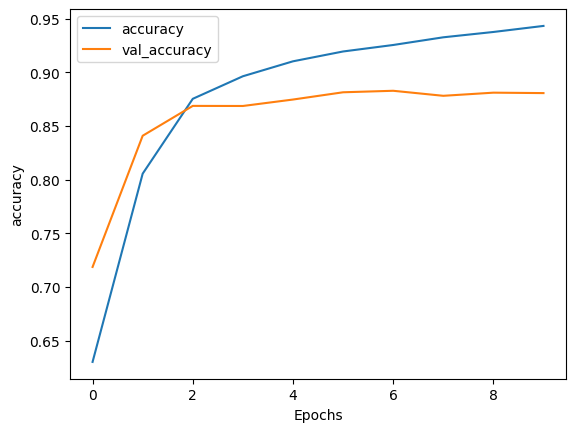

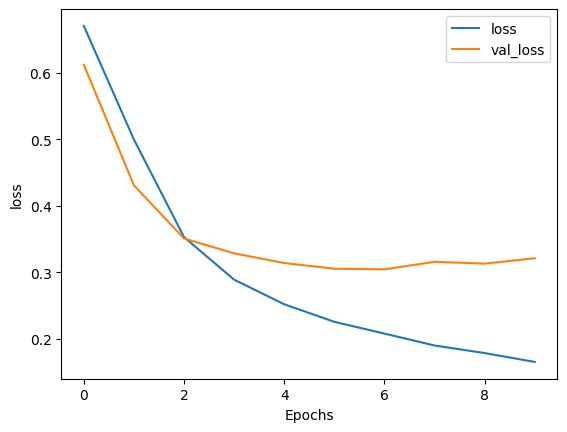

In [ ]:
plot_graphs(history_IMDB2, 'accuracy')
plot_graphs(history_IMDB2, 'loss')

In [ ]:
import io

In [ ]:
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")

out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ex. 2) Classifying BBC News into Topics

See distinct notebook: C3W2_Assignment.ipynb

# § 03.03. Sequence Models / RNN (Recurring NN)

## Multi-layer LSTM / Long Short-Term Memory

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
import tensorflow_datasets as tfds

from __future__ import absolute_import, division, print_function, unicode_literals

In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteMREJ81/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteMREJ81/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteMREJ81/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
tokenizer = info.features['text'].encoder

In [5]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [6]:
BUFFER_SIZE = 10_000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)

test_dataset = test_dataset.padded_batch(BATCH_SIZE)

In [7]:
model_LSTM = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirection  (None, None, 128)         66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635329 (2.42 MB)
Trainable params: 635329 

In [9]:
model_LSTM.compile(loss='binary_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

In [10]:
NUM_EPOCHS = 10

history_LSTM = model_LSTM.fit(train_dataset,
                              epochs=NUM_EPOCHS,
                              validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 144s 346ms/step - loss: 0.6051 - accuracy: 0.6618 - val_loss: 0.6666 - val_accuracy: 0.5942
Epoch 2/10
391/391 [==============================] - 116s 296ms/step - loss: 0.6076 - accuracy: 0.6693 - val_loss: 0.6142 - val_accuracy: 0.6690
Epoch 3/10
391/391 [==============================] - 101s 259ms/step - loss: 0.4765 - accuracy: 0.7763 - val_loss: 0.5917 - val_accuracy: 0.6922
Epoch 4/10
391/391 [==============================] - 95s 241ms/step - loss: 0.4504 - accuracy: 0.7983 - val_loss: 0.5388 - val_accuracy: 0.7384
Epoch 5/10
391/391 [==============================] - 90s 229ms/step - loss: 0.3934 - accuracy: 0.8314 - val_loss: 0.4841 - val_accuracy: 0.7801
Epoch 6/10
391/391 [==============================] - 87s 221ms/step - loss: 0.3156 - accuracy: 0.8737 - val_loss: 0.4046 - val_accuracy: 0.8362
Epoch 7/10
391/391 [==============================] - 83s 212ms/step - loss: 0.2356 - accuracy: 0.9097 - val_loss: 0.3407 - val

In [11]:
import matplotlib.pyplot as plt

In [14]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

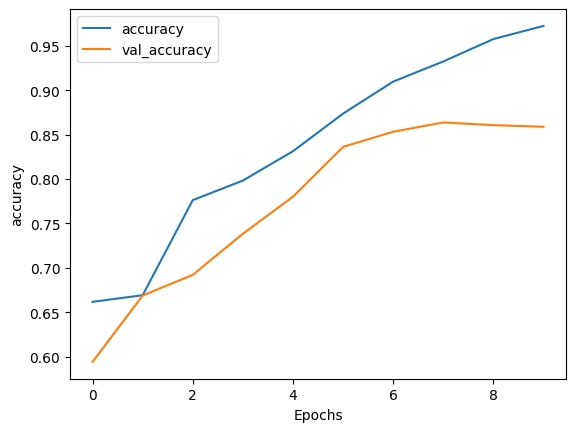

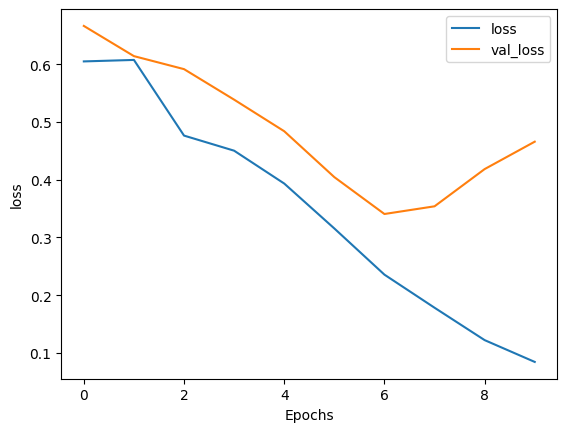

In [15]:
plot_graphs(history_LSTM, 'accuracy')
plot_graphs(history_LSTM, 'loss')

## Multi-layer GRU / Gated Recurrent Units

In [16]:
model_GRU = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
model_GRU.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          523840    
                                                                 
 conv1d (Conv1D)             (None, None, 128)         41088     
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 573249 (2.19 MB)
Trainable params: 573249 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [18]:
model_GRU.compile(loss='binary_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

In [19]:
NUM_EPOCHS = 10

history_GRU = model_GRU.fit(train_dataset,
                            epochs=NUM_EPOCHS,
                            validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 135s 335ms/step - loss: 0.4509 - accuracy: 0.7764 - val_loss: 0.3069 - val_accuracy: 0.8771
Epoch 2/10
391/391 [==============================] - 47s 120ms/step - loss: 0.2233 - accuracy: 0.9164 - val_loss: 0.3040 - val_accuracy: 0.8750
Epoch 3/10
391/391 [==============================] - 35s 89ms/step - loss: 0.1714 - accuracy: 0.9375 - val_loss: 0.3195 - val_accuracy: 0.8748
Epoch 4/10
391/391 [==============================] - 25s 63ms/step - loss: 0.1376 - accuracy: 0.9512 - val_loss: 0.3744 - val_accuracy: 0.8635
Epoch 5/10
391/391 [==============================] - 20s 52ms/step - loss: 0.1104 - accuracy: 0.9618 - val_loss: 0.3889 - val_accuracy: 0.8639
Epoch 6/10
391/391 [==============================] - 17s 43ms/step - loss: 0.0902 - accuracy: 0.9715 - val_loss: 0.4514 - val_accuracy: 0.8594
Epoch 7/10
391/391 [==============================] - 15s 38ms/step - loss: 0.0674 - accuracy: 0.9805 - val_loss: 0.5343 - val_accura

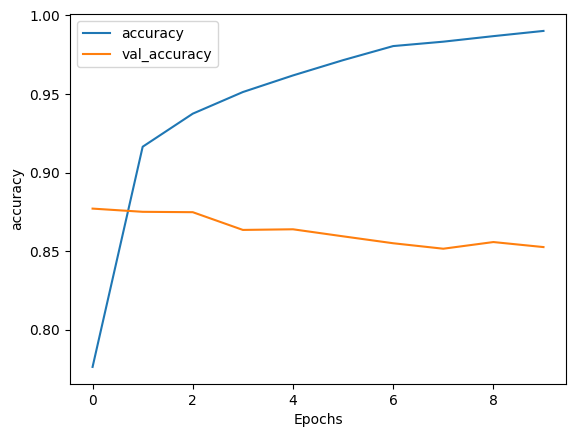

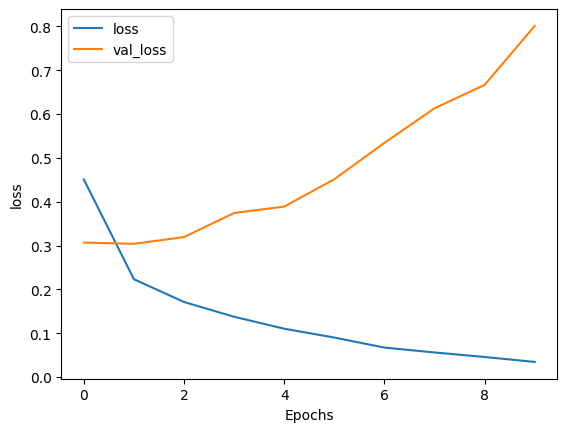

In [20]:
plot_graphs(history_GRU, 'accuracy')
plot_graphs(history_GRU, 'loss')

## IMDb Reviews w/ GRU, LSTM, Conv1D

In [21]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [22]:
import tensorflow_datasets as tfds

# If the import fails, run this
# !pip install -q tensorflow-datasets

In [23]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteDTEAB0/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteDTEAB0/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteDTEAB0/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [24]:
import numpy as np

In [25]:
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s, l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

for s, l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [28]:
vocab_size = 10_000
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [29]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? ? i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of what

In [31]:
embedding_dim = 16

model_IMDB_GRU = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_IMDB_GRU.compile(loss='binary_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])
model_IMDB_GRU.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                9600      
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 169997 (664.05 KB)
Trainable params: 169997 (664.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
782/782 [==============================] - 48s 55ms/step - loss: 0.5165 - accuracy: 0.7180 - val_loss: 0.3554 - val_accuracy: 0.8485
Epoch 2/50
782/782 [==============================] - 18s 23ms/step - loss: 0.3000 - accuracy: 0.8773 - val_loss: 0.3632 - val_accuracy: 0.8468
Epoch 3/50
782/782 [==============================] - 16s 20ms/step - loss: 0.2261 - accuracy: 0.9136 - val_loss: 0.4135 - val_accuracy: 0.8335
Epoch 4/50
782/782 [==============================] - 14s 18ms/step - loss: 0.1703 - accuracy: 0.9378 - val_loss: 0.4353 - val_accuracy: 0.8355
Epoch 5/50
782/782 [==============================] - 14s 18ms/step - loss: 0.1196 - accuracy: 0.9580 - val_loss: 0.5041 - val_accuracy: 0.8239
Epoch 6/50
782/782 [==============================] - 14s 18ms/step - loss: 0.0809 - accuracy: 0.9730 - val_loss: 0.6203 - val_accuracy: 0.8184
Epoch 7/50
782/782 [==============================] - 15s 19ms/step - loss: 0.0503 - accuracy: 0.9832 - val_loss: 0.7184 - val_accuracy:

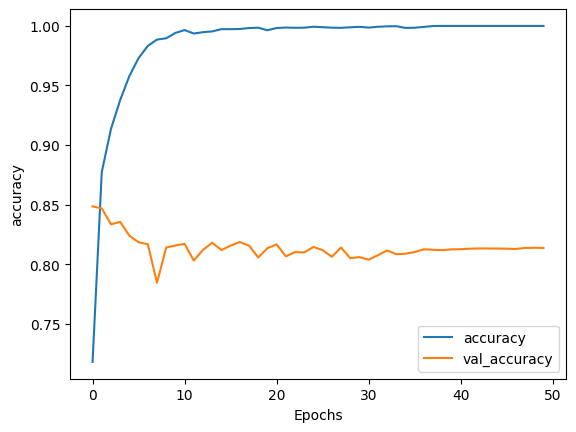

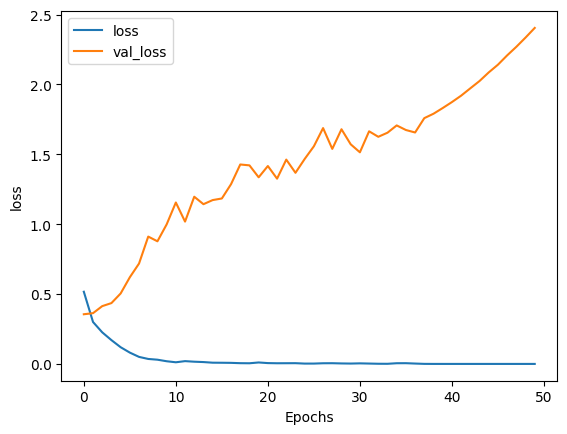

In [32]:
num_epochs = 50

history_IMDB_GRU = model_IMDB_GRU.fit(padded, training_labels_final,
                                      epochs=num_epochs,
                                      validation_data=(testing_padded, testing_labels_final))

plot_graphs(history_IMDB_GRU, 'accuracy')
plot_graphs(history_IMDB_GRU, 'loss')

In [33]:
model_IMDB_LSTM = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_IMDB_LSTM.compile(loss='binary_crossentropy',
                        optimizer='adam',
                        metrics=['accuracy'])
model_IMDB_LSTM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                12544     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 6)                 390       
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 172941 (675.55 KB)
Trainable params: 172941 (675.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
782/782 [==============================] - 36s 40ms/step - loss: 0.4811 - accuracy: 0.7646 - val_loss: 0.3536 - val_accuracy: 0.8474
Epoch 2/50
782/782 [==============================] - 17s 22ms/step - loss: 0.2948 - accuracy: 0.8808 - val_loss: 0.3462 - val_accuracy: 0.8494
Epoch 3/50
782/782 [==============================] - 17s 21ms/step - loss: 0.2302 - accuracy: 0.9126 - val_loss: 0.3808 - val_accuracy: 0.8428
Epoch 4/50
782/782 [==============================] - 14s 18ms/step - loss: 0.1832 - accuracy: 0.9328 - val_loss: 0.4255 - val_accuracy: 0.8353
Epoch 5/50
782/782 [==============================] - 14s 18ms/step - loss: 0.1390 - accuracy: 0.9513 - val_loss: 0.4935 - val_accuracy: 0.8272
Epoch 6/50
782/782 [==============================] - 14s 18ms/step - loss: 0.1159 - accuracy: 0.9598 - val_loss: 0.5608 - val_accuracy: 0.8233
Epoch 7/50
782/782 [==============================] - 14s 18ms/step - loss: 0.0920 - accuracy: 0.9693 - val_loss: 0.6229 - val_accuracy:

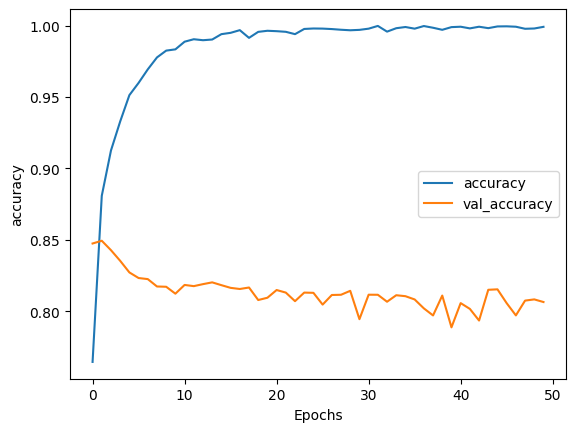

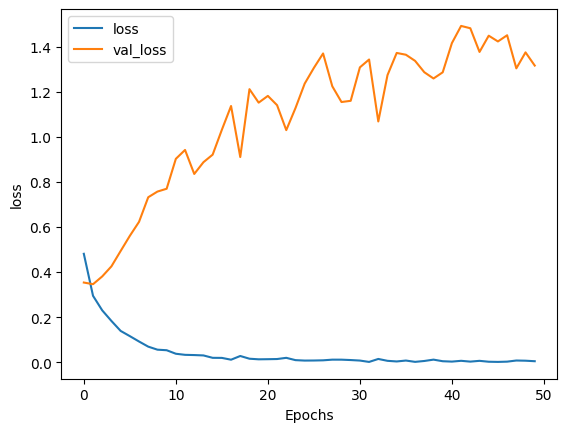

In [34]:
num_epochs = 50

history_IMDB_LSTM = model_IMDB_LSTM.fit(padded, training_labels_final,
                                        epochs=num_epochs,
                                        validation_data=(testing_padded, testing_labels_final))

plot_graphs(history_IMDB_LSTM, 'accuracy')
plot_graphs(history_IMDB_LSTM, 'loss')

In [35]:
model_IMDB_C1D = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_IMDB_C1D.compile(loss='binary_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])
model_IMDB_C1D.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d_1 (Conv1D)           (None, 116, 128)          10368     
                                                                 
 global_average_pooling1d_1  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_8 (Dense)             (None, 6)                 774       
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171149 (668.55 KB)
Trainable params: 171149 (668.55 KB)
Non-trainable params: 0 (0.00 Byte)
______________

Epoch 1/50
782/782 [==============================] - 25s 30ms/step - loss: 0.4459 - accuracy: 0.7737 - val_loss: 0.3433 - val_accuracy: 0.8499
Epoch 2/50
782/782 [==============================] - 7s 10ms/step - loss: 0.2778 - accuracy: 0.8878 - val_loss: 0.3686 - val_accuracy: 0.8399
Epoch 3/50
782/782 [==============================] - 6s 8ms/step - loss: 0.2242 - accuracy: 0.9143 - val_loss: 0.3862 - val_accuracy: 0.8369
Epoch 4/50
782/782 [==============================] - 6s 7ms/step - loss: 0.1844 - accuracy: 0.9322 - val_loss: 0.4338 - val_accuracy: 0.8286
Epoch 5/50
782/782 [==============================] - 7s 9ms/step - loss: 0.1523 - accuracy: 0.9454 - val_loss: 0.4888 - val_accuracy: 0.8264
Epoch 6/50
782/782 [==============================] - 7s 9ms/step - loss: 0.1241 - accuracy: 0.9578 - val_loss: 0.5355 - val_accuracy: 0.8218
Epoch 7/50
782/782 [==============================] - 5s 6ms/step - loss: 0.0970 - accuracy: 0.9682 - val_loss: 0.6402 - val_accuracy: 0.8160
Epo

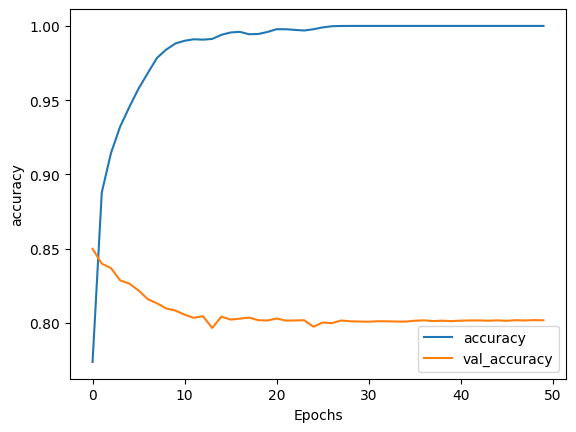

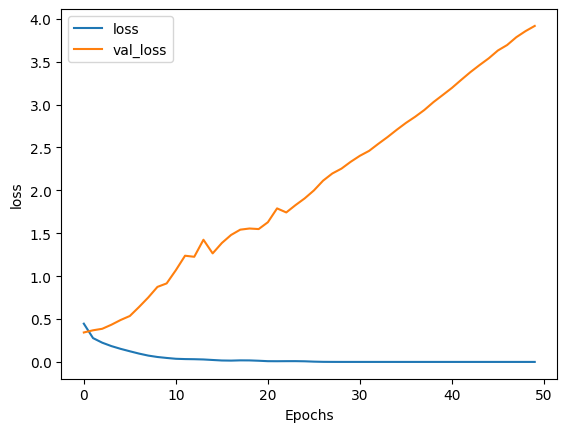

In [36]:
num_epochs = 50

history_IMDB_C1D = model_IMDB_C1D.fit(padded, training_labels_final,
                                      epochs=num_epochs,
                                      validation_data=(testing_padded, testing_labels_final))

plot_graphs(history_IMDB_C1D, 'accuracy')
plot_graphs(history_IMDB_C1D, 'loss')

## Sarcasm Data w/ LSTM, Conv1D

In [37]:
import json
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import io

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [46]:
!wget "https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json" \
    -O "/tmp/sarcasm.json"

--2024-01-26 20:57:32--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0d::cf, 2607:f8b0:4023:c0b::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.09s   

2024-01-26 20:57:32 (56.9 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [47]:
with open("/tmp/sarcasm.json", 'r') as f:
  datastore = json.load(f)

sentences = []
labels = []
urls = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [48]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = ""
training_size = 20000

In [49]:
training_sentences = sentences[0 : training_size]
testing_sentences = sentences[training_size :]
training_labels = labels[0 : training_size]
testing_labels = labels[training_size :]

In [50]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [51]:
model_S_LSTM = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_S_LSTM.compile(loss='binary_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

model_S_LSTM.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_4 (Bidirecti  (None, 64)                12544     
 onal)                                                           
                                                                 
 dense_10 (Dense)            (None, 24)                1560      
                                                                 
 dense_11 (Dense)            (None, 1)                 25        
                                                                 
Total params: 174129 (680.19 KB)
Trainable params: 174129 (680.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
num_epochs = 50

# Need this block to get it to work w/ TF 2.x
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

history_S_LSTM = model_S_LSTM.fit(training_padded, training_labels,
                                  epochs=num_epochs,
                                  validation_data=(testing_padded, testing_labels),
                                  verbose=1)

Epoch 1/50
625/625 [==============================] - 25s 33ms/step - loss: 0.4152 - accuracy: 0.7944 - val_loss: 0.3305 - val_accuracy: 0.8578
Epoch 2/50
625/625 [==============================] - 9s 15ms/step - loss: 0.2207 - accuracy: 0.9096 - val_loss: 0.3448 - val_accuracy: 0.8530
Epoch 3/50
625/625 [==============================] - 8s 14ms/step - loss: 0.1434 - accuracy: 0.9459 - val_loss: 0.3945 - val_accuracy: 0.8521
Epoch 4/50
625/625 [==============================] - 9s 14ms/step - loss: 0.0892 - accuracy: 0.9682 - val_loss: 0.4777 - val_accuracy: 0.8439
Epoch 5/50
625/625 [==============================] - 8s 13ms/step - loss: 0.0575 - accuracy: 0.9818 - val_loss: 0.5704 - val_accuracy: 0.8411
Epoch 6/50
625/625 [==============================] - 8s 14ms/step - loss: 0.0373 - accuracy: 0.9881 - val_loss: 0.6311 - val_accuracy: 0.8429
Epoch 7/50
625/625 [==============================] - 9s 15ms/step - loss: 0.0267 - accuracy: 0.9919 - val_loss: 0.7484 - val_accuracy: 0.840

In [53]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

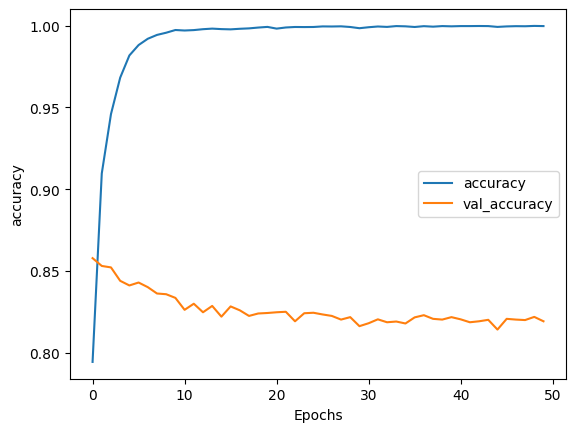

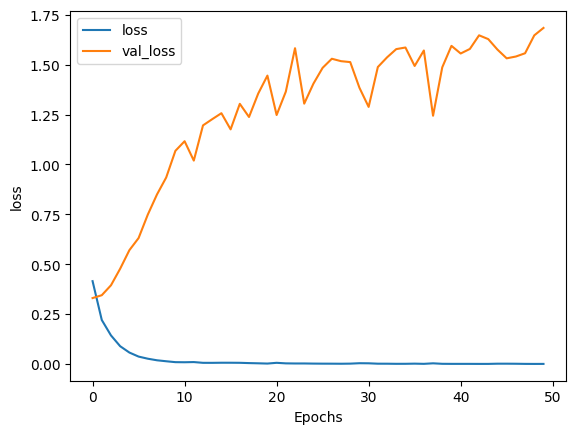

In [54]:
plot_graphs(history_S_LSTM, 'accuracy')
plot_graphs(history_S_LSTM, 'loss')

In [55]:
model_S_LSTM.save("history_S_LSTM.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [57]:
model_S_C1D = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_S_C1D.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

model_S_C1D.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d_3 (Conv1D)           (None, 116, 128)          10368     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_12 (Dense)            (None, 24)                3096      
                                                                 
 dense_13 (Dense)            (None, 1)                 25        
                                                                 
Total params: 173489 (677.69 KB)
Trainable params: 173489 (677.69 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [58]:
num_epochs = 50

# Need this block to get it to work w/ TF 2.x
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

history_S_C1D = model_S_C1D.fit(training_padded, training_labels,
                                epochs=num_epochs,
                                validation_data=(testing_padded, testing_labels),
                                verbose=1)

Epoch 1/50
625/625 [==============================] - 12s 17ms/step - loss: 0.4414 - accuracy: 0.7817 - val_loss: 0.3509 - val_accuracy: 0.8502
Epoch 2/50
625/625 [==============================] - 4s 6ms/step - loss: 0.2243 - accuracy: 0.9100 - val_loss: 0.3606 - val_accuracy: 0.8544
Epoch 3/50
625/625 [==============================] - 3s 5ms/step - loss: 0.1111 - accuracy: 0.9613 - val_loss: 0.4461 - val_accuracy: 0.8463
Epoch 4/50
625/625 [==============================] - 6s 10ms/step - loss: 0.0448 - accuracy: 0.9866 - val_loss: 0.6009 - val_accuracy: 0.8365
Epoch 5/50
625/625 [==============================] - 5s 8ms/step - loss: 0.0151 - accuracy: 0.9954 - val_loss: 0.7575 - val_accuracy: 0.8348
Epoch 6/50
625/625 [==============================] - 5s 8ms/step - loss: 0.0055 - accuracy: 0.9987 - val_loss: 0.8333 - val_accuracy: 0.8378
Epoch 7/50
625/625 [==============================] - 3s 5ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.9401 - val_accuracy: 0.8377
Epo

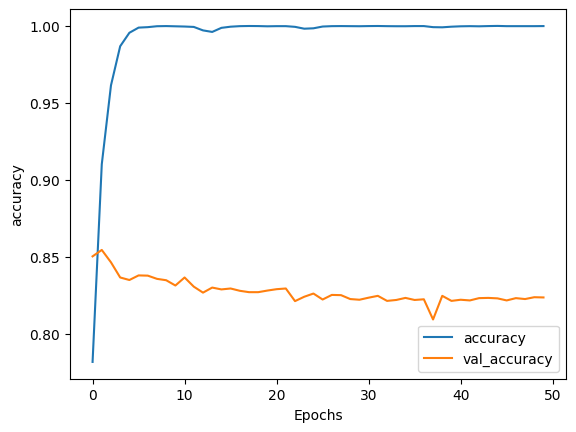

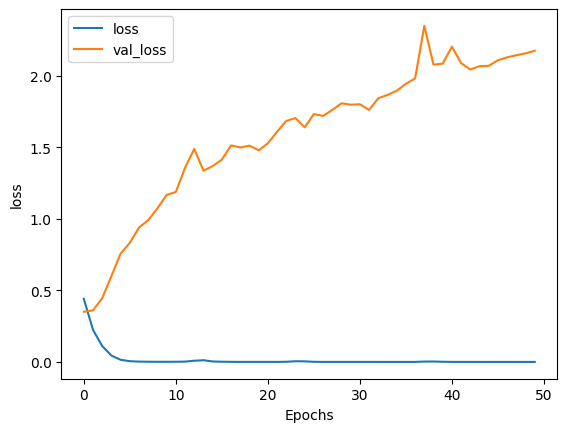

In [59]:
plot_graphs(history_S_C1D, 'accuracy')
plot_graphs(history_S_C1D, 'loss')

In [61]:
# model_S_C1D.save("history_S_C1D.h5")

## Ex. 3) Exploring overfitting in NLP

See distinct notebook: C3W3_Assignment.ipynb

# § 03.04. Sequence Models & Literature

## Finding [predicting] what the next word should be ...

In [68]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

In [69]:
!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt" \
    -O "/tmp/irish-lyrics-eof.txt"

--2024-01-26 21:20:31--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c06::cf, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-01-26 21:20:32 ERROR 404: Not Found.



In [70]:
tokenizer = Tokenizer()

# data = open("/tmp/irish-lyrics-eof.txt").read()
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")
print(corpus)

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

['in the town of athy one jeremy lanigan ', ' battered away til he hadnt a pound. ', 'his father died and made him a man again ', ' left him a farm and ten acres of ground. ', 'he gave a grand party for friends and relations ', 'who didnt forget him when come to the wall, ', 'and if youll but listen ill make your eyes glisten ', 'of the rows and the ructions of lanigans ball. ', 'myself to be sure got free invitation, ', 'for all the nice girls and boys i might ask, ', 'and just in a minute both friends and relations ', 'were dancing round merry as bees round a cask. ', 'judy odaly, that nice little milliner, ', 'she tipped me a wink for to give her a call, ', 'and i soon arrived with peggy mcgilligan ', 'just in time for lanigans ball. ', 'there were lashings of punch and wine for the ladies, ', 'potatoes and cakes; there was bacon and tea, ', 'there were the nolans, dolans, ogradys ', 'courting the girls and dancing away. ', 'songs they went round as plenty as water, ', 'the harp tha

In [71]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[: i+1]
    input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create predictors and label
xs, labels = input_sequences[:, :-1], input_sequences[:, -1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [72]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [73]:
print(xs[6])
print(ys[6])

[ 0  0  0  4  2 66  8 67 68 69]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [74]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [75]:
sentence = corpus[0].split()
print(f"sample sentence: {sentence}")

token_list = []

for word in sentence:
  token_list.append(tokenizer.word_index[word])

print(token_list)

sample sentence: ['in', 'the', 'town', 'of', 'athy', 'one', 'jeremy', 'lanigan']
[4, 2, 66, 8, 67, 68, 69, 70]


In [76]:
elem_no = 42

print(f"Token list: {xs[elem_no]}")
print(f"Decoded to text: {tokenizer.sequences_to_texts([xs[elem_no]])}")

Token list: [ 0  0  0  0 85 86 87 33 44 88]
Decoded to text: ['who didnt forget him when come']


In [77]:
print(f"One-hot label: {ys[elem_no]}")
print(f"Index of label: {np.argmax(ys[elem_no])}")

One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Index of label: 13


In [78]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [79]:
model_Nw = Sequential()
model_Nw.add(Embedding(total_words, 100, input_length = max_sequence_len - 1))
model_Nw.add(Bidirectional(LSTM(150)))
model_Nw.add(Dense(total_words, activation='softmax'))

adam = Adam(lr=0.01)
model_Nw.compile(loss='categorical_crossentropy',
                 optimizer=adam,
                 metrics=['accuracy'])

# earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history_Nw = model_Nw.fit(xs, ys,
                          epochs=100,
                          verbose=1)

# model_Nw.summary()
print(model_Nw)

Epoch 1/100
15/15 [==============================] - 7s 158ms/step - loss: 5.5512 - accuracy: 0.0265
Epoch 2/100
15/15 [==============================] - 1s 98ms/step - loss: 5.2763 - accuracy: 0.0508
Epoch 3/100
15/15 [==============================] - 1s 87ms/step - loss: 5.1120 - accuracy: 0.0508
Epoch 4/100
15/15 [==============================] - 1s 46ms/step - loss: 5.0563 - accuracy: 0.0508
Epoch 5/100
15/15 [==============================] - 1s 63ms/step - loss: 4.9810 - accuracy: 0.0530
Epoch 6/100
15/15 [==============================] - 0s 29ms/step - loss: 4.8891 - accuracy: 0.0618
Epoch 7/100
15/15 [==============================] - 1s 61ms/step - loss: 4.7834 - accuracy: 0.0508
Epoch 8/100
15/15 [==============================] - 0s 7ms/step - loss: 4.6408 - accuracy: 0.0574
Epoch 9/100
15/15 [==============================] - 1s 51ms/step - loss: 4.5460 - accuracy: 0.0640
Epoch 10/100
15/15 [==============================] - 0s 19ms/step - loss: 4.4357 - accuracy: 0.0662

In [80]:
import matplotlib.pyplot as plt

In [81]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

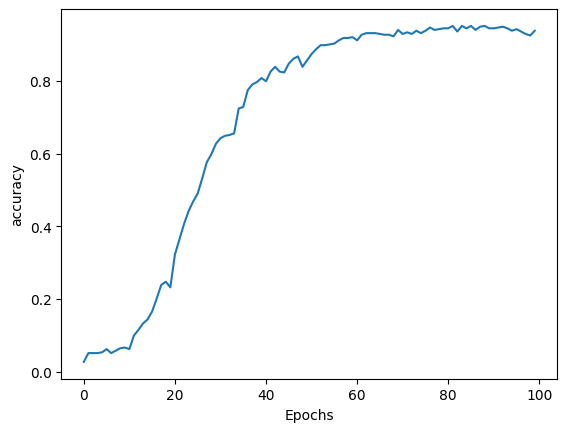

In [82]:
plot_graphs(history_Nw, 'accuracy')

In [86]:
seed_text = "I've got a good feeling about this"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen = max_sequence_len - 1, padding='pre')
  probabilities = model_Nw.predict(token_list)
  predicted = np.argmax(probabilities, axis=-1)[0]
  if predicted != 0:
    output_word = tokenizer.index_word[predicted]
    seed_text += " " + output_word

print(seed_text)

1/1 [==============================] - 0s 17ms/step
I've got a good feeling about this up the was was hullabaloo murther murther call a glisten glisten glisten wall wall father by replied the wall wall wall wall replied me a wall wall rows me me a water water father father a daughter daughter wall wall father glisten took wall wall wall accident glisten glisten glisten glisten glisten glisten glisten suppose the glisten glisten glisten glisten glisten wall odaly a glisten glisten glisten wall wall father long the wall wall wall wall replied me a wall might wall wall wall ask ground me a wall wall wall wall replied me a replied the wall rose rose


## Ex. 4) [Shakespeare] Poem generation w/ Bi-directional LSTM

See also, diff. version in Final Assignment notebook: C4W4_Assignment.ipynb


In [87]:
import tensorflow.keras.utils as ku
import numpy as np

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [89]:
!pip install gdown==4.6.0
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 2.25MB/s]


In [95]:
SONNETS_FILE = './sonnets.txt'

with open('./sonnets.txt') as f:
    data = f.read()

corpus = data.lower().split("\n")

tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# Create input sequences using list of tokens
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]

  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[: i+1]
    input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create predictors and label
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]

label = ku.to_categorical(label, num_classes=total_words)

In [96]:
model_ex_4 = Sequential()
model_ex_4.add(Embedding(total_words, 100, input_length = max_sequence_len - 1))
model_ex_4.add(Bidirectional(LSTM(150, return_sequences=True)))
model_ex_4.add(Dropout(0.2))
model_ex_4.add(LSTM(100))
model_ex_4.add(Dense(total_words / 2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_ex_4.add(Dense(total_words, activation='softmax'))

model_ex_4.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

print(model_ex_4.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 10, 100)           321100    
                                                                 
 bidirectional_7 (Bidirecti  (None, 10, 300)           301200    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 10, 300)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100)               160400    
                                                                 
 dense_17 (Dense)            (None, 1605)              162105    
                                                                 
 dense_18 (Dense)            (None, 3211)              5156866   
                                                      

In [97]:
history_ex_4 = model_ex_4.fit(predictors, label,
                              epochs=100,
                              verbose=1)

Epoch 1/100
484/484 [==============================] - 16s 22ms/step - loss: 6.9161 - accuracy: 0.0197
Epoch 2/100
484/484 [==============================] - 6s 12ms/step - loss: 6.4966 - accuracy: 0.0233
Epoch 3/100
484/484 [==============================] - 5s 11ms/step - loss: 6.3927 - accuracy: 0.0251
Epoch 4/100
484/484 [==============================] - 5s 11ms/step - loss: 6.2753 - accuracy: 0.0302
Epoch 5/100
484/484 [==============================] - 5s 10ms/step - loss: 6.1756 - accuracy: 0.0371
Epoch 6/100
484/484 [==============================] - 5s 11ms/step - loss: 6.0923 - accuracy: 0.0390
Epoch 7/100
484/484 [==============================] - 5s 11ms/step - loss: 5.9995 - accuracy: 0.0431
Epoch 8/100
484/484 [==============================] - 5s 10ms/step - loss: 5.9079 - accuracy: 0.0482
Epoch 9/100
484/484 [==============================] - 6s 12ms/step - loss: 5.8003 - accuracy: 0.0536
Epoch 10/100
484/484 [==============================] - 6s 12ms/step - loss: 5.68

In [98]:
import matplotlib.pyplot as plt

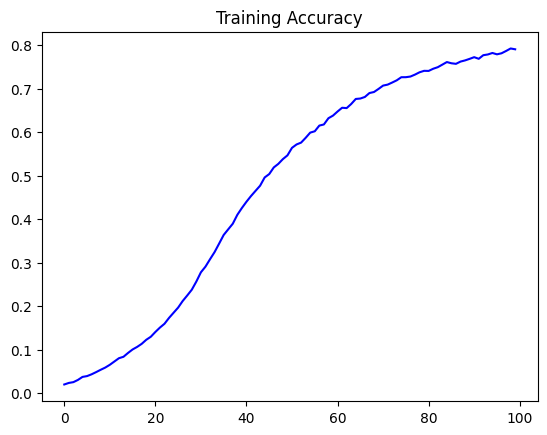

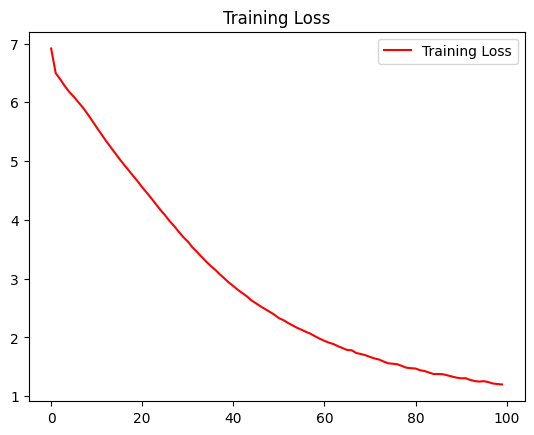

In [102]:
acc = history_ex_4.history['accuracy']
loss = history_ex_4.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.title('Training Accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training Loss')
plt.legend()

plt.show()

In [103]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen = max_sequence_len - 1, padding='pre')
  probabilities = model_Nw.predict(token_list)
  predicted = np.argmax(probabilities, axis=-1)[0]
  if predicted != 0:
    output_word = tokenizer.index_word[predicted]
    seed_text += " " + output_word

print(seed_text)

1/1 [==============================] - 0s 16ms/step
Help me Obi Wan Kenobi, you're my only hope hast that know find for nor to their their their new thou nor to much gentle day against good good much be their their their their pen nor to their their new nor nor to much much like like to ' ' their their like day form their their their gentle day day day day day day day end the day day day day day their life to day day day their their like have the their their their their pen nor to their let their their their well being nor to their their their their pen nor to pen
